In [2]:
pip install scikit-learn

                                              0.0/9.2 MB ? eta -:--:--
                                              0.1/9.2 MB 2.0 MB/s eta 0:00:05
                                              0.1/9.2 MB 1.1 MB/s eta 0:00:09
     -                                        0.3/9.2 MB 2.1 MB/s eta 0:00:05
     -                                        0.4/9.2 MB 2.0 MB/s eta 0:00:05
     -                                        0.4/9.2 MB 1.8 MB/s eta 0:00:05
     --                                       0.5/9.2 MB 1.6 MB/s eta 0:00:06
     --                                       0.5/9.2 MB 1.7 MB/s eta 0:00:06
     --                                       0.6/9.2 MB 1.7 MB/s eta 0:00:06
     ---                                      0.7/9.2 MB 1.8 MB/s eta 0:00:05
     ---                                      0.8/9.2 MB 1.7 MB/s eta 0:00:05
     ---                                      0.8/9.2 MB 1.7 MB/s eta 0:00:05
     ----                                     0.9/9.2 MB 1.7 MB/s eta 0


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [5]:
import os
print("Current directory:", os.getcwd())
print("Files in current directory:", os.listdir())


Current directory: c:\Users\Likit\OneDrive\Desktop\VS Code\CV\Computer Vision\M-5
Files in current directory: ['coco.names', 'naiveBayes.ipynb', 'objectdetection.ipynb', 'yolov3.cfg', 'yolov3.weights']


In [17]:
data = pd.read_csv("seattle-weather.csv")
data.head()


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [18]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [19]:
data.isnull().any()

date             False
precipitation    False
temp_max         False
temp_min         False
wind             False
weather          False
dtype: bool

In [20]:
data.dropna(inplace=True)

In [21]:
data.isnull().any()

date             False
precipitation    False
temp_max         False
temp_min         False
wind             False
weather          False
dtype: bool

In [22]:
data.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [24]:
data.drop(columns='date', inplace=True)

In [30]:
data.columns = data.columns.str.strip()


In [32]:
features=['PRCP', 'TMAX', 'TMIN',]
x = data.iloc[:, [0, 1, 2]] 

y=data.iloc[:,3]

In [33]:
x.head()

,precipitation,temp_max,temp_min
0,0.0,12.8,5.0
1,10.9,10.6,2.8
2,0.8,11.7,7.2
3,20.3,12.2,5.6
4,1.3,8.9,2.8


In [34]:
y

0       4.7
1       4.5
2       2.3
3       4.7
4       6.1
       ... 
1456    2.9
1457    1.3
1458    2.6
1459    3.4
1460    3.5
Name: wind, Length: 1461, dtype: float64

In [35]:
y = y.astype(int)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [39]:
x_train.shape,y_test.shape,y_train.shape

((1022, 3), (439,), (1022,))

# model building

In [40]:
naiveBayes=GaussianNB()

In [41]:
naiveBayes.fit(x_train,y_train)

GaussianNB()

In [42]:
y_pred=naiveBayes.predict(x_test)

In [43]:
print("trainscore ",accuracy_score(y_train,naiveBayes.predict(x_train)))
print("testscore ",accuracy_score(y_test,y_pred))

trainscore  0.28864970645792565
testscore  0.2984054669703872


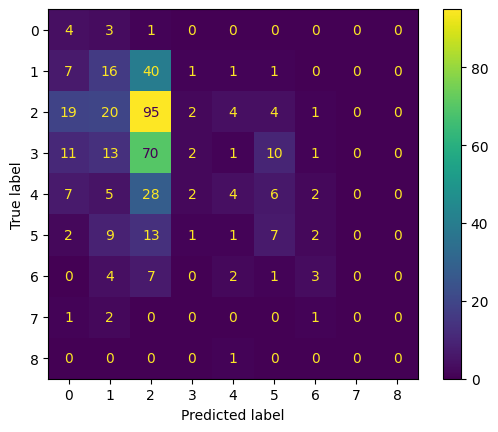

In [44]:
confusion=confusion_matrix(y_test,y_pred,labels=naiveBayes.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=confusion,display_labels=naiveBayes.classes_)
display.plot()